In [3]:
import numpy as np
import pandas as pd

players_df = pd.read_csv('players.csv')
results_df = pd.read_csv('results.csv')

In [4]:
players_df.shape, results_df.shape

((383317, 101), (45773, 19))

In [5]:
df = pd.DataFrame()

# Join all the individual maps played into one table
for i in [1, 2, 3]:
    player_columns = ['match_id', 'player_id', 'team', f'map_{i}',
                      f'm{i}_kills', f'm{i}_assists', f'm{i}_deaths', f'm{i}_hs', f'm{i}_flash_assists',
                      f'm{i}_kast', f'm{i}_kddiff', f'm{i}_adr', f'm{i}_fkdiff', f'm{i}_rating']
    temp_df = players_df[player_columns]
    # Rename the columns to exclude map index
    temp_df.columns = ['match_id', 'player_id', 'team', '_map',
                      'kills', 'assists', 'deaths', 'hs', 'flash_assists',
                      'kast', 'kddiff', 'adr', 'fkdiff', 'rating']
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

/var/folders/_t/pqhgzhkx0s3dlljndz6jmysh0000gn/T/ipykernel_57611/924729590.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/_t/pqhgzhkx0s3dlljndz6jmysh0000gn/T/ipykernel_57611/924729590.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/_t/pqhgzhkx0s3dlljndz6jmysh0000gn/T/ipykernel_57611/924729590.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)


In [6]:
df. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448711 entries, 0 to 367130
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       448711 non-null  int64  
 1   player_id      448711 non-null  int64  
 2   team           448711 non-null  object 
 3   _map           448711 non-null  object 
 4   kills          448711 non-null  float64
 5   assists        448711 non-null  float64
 6   deaths         448711 non-null  float64
 7   hs             448711 non-null  float64
 8   flash_assists  448711 non-null  float64
 9   kast           448711 non-null  float64
 10  kddiff         448711 non-null  float64
 11  adr            448711 non-null  float64
 12  fkdiff         448711 non-null  float64
 13  rating         448711 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 51.4+ MB


In [7]:
# Add the rounds won/lost data from results_df to our dataframe
teams_df_list = [None, None]
for i in range(2):
    teams_df_list[i] = results_df[['match_id', '_map', f'team_{i+1}', f'result_{i+1}', f'result_{(not i) + 1}']]
    teams_df_list[i].rename(columns={f'team_{i+1}': 'team', f'result_{i+1}': 'rounds_won', f'result_{(not i) + 1}': 'rounds_lost'}, inplace = True) 

teams_df = pd.concat(teams_df_list)
df = df.merge(teams_df, on=['match_id', '_map', 'team'])

/var/folders/_t/pqhgzhkx0s3dlljndz6jmysh0000gn/T/ipykernel_57611/841191936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_df_list[i].rename(columns={f'team_{i+1}': 'team', f'result_{i+1}': 'rounds_won', f'result_{(not i) + 1}': 'rounds_lost'}, inplace = True)
/var/folders/_t/pqhgzhkx0s3dlljndz6jmysh0000gn/T/ipykernel_57611/841191936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_df_list[i].rename(columns={f'team_{i+1}': 'team', f'result_{i+1}': 'rounds_won', f'result_{(not i) + 1}': 'rounds_lost'}, inplace = True)


In [8]:
df.shape

(326676, 16)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['team'].nunique()

In [ ]:
# Creating a mapping from team names to unique integers
team_to_id = {team: idx for idx, team in enumerate(df['team'].unique())}

# Replacing team names with their corresponding unique IDs in the dataset
df['team_id'] = df['team'].map(team_to_id)

# Dropping the original 'team' column
df.drop('team', axis=1, inplace=True)

df.head()


In [ ]:
df.dtypes

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Preparing the data
X = df.drop(['rating', 'match_id', 'player_id', 'team'], axis=1)
y = df['rating']

# One-hot encoding for the '_map' column
X = pd.get_dummies(X, columns=['_map'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "kNN": KNeighborsRegressor()
}

# Function to train model and calculate metrics
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return {
        "RMSE": rmse,
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    }

# Evaluating each model and storing results
all_results = {}
for name, model in models.items():
    results = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    all_results[name] = results

all_results


{'Linear Regression': {'RMSE': 0.060479499039668025,
  'MSE': 0.0036577698040892053,
  'MAE': 0.046500738054450534,
  'R2': 0.9667056789453798,
  'MAPE': 4.902848364855232},
 'Decision Tree': {'RMSE': 0.07391219355941608,
  'MSE': 0.005463012356764589,
  'MAE': 0.057805373304898836,
  'R2': 0.9502737194866292,
  'MAPE': 6.037669031510615},
 'Random Forest': {'RMSE': 0.051122527675513015,
  'MSE': 0.002613512835933594,
  'MAE': 0.04011237819250431,
  'R2': 0.976210877091646,
  'MAPE': 4.2105529672190025},
 'Gradient Boosting': {'RMSE': 0.05211868801011995,
  'MSE': 0.002716357639896221,
  'MAE': 0.04090889802722333,
  'R2': 0.9752747471257572,
  'MAPE': 4.3068676193953},
 'kNN': {'RMSE': 0.056435620632226666,
  'MSE': 0.003184979276144608,
  'MAE': 0.04416421946266952,
  'R2': 0.9710091864026761,
  'MAPE': 4.609200270855777}}

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "kNN": KNeighborsRegressor()
}

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        "RMSE": rmse,
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    }


def evaluate_model(name, model, X_train, y_train, X_test, y_test, validation_size=0.2, random_state=42):
    # Split the training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=random_state)

    # Training the model
    model.fit(X_train, y_train)

    # Predictions on the training set
    y_train_pred = model.predict(X_train)
    
    # Predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Predictions on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics for each set
    metrics_train = calculate_metrics(y_train, y_train_pred)
    metrics_val = calculate_metrics(y_val, y_val_pred)
    metrics_test = calculate_metrics(y_test, y_test_pred)

    return {
        "Train Metrics": metrics_train,
        "Validation Metrics": metrics_val,
        "Test Metrics": metrics_test
    }

# Rest of the code remains unchanged

# Evaluating each model and storing results
all_results = {}
for name, model in models.items():
    results = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    all_results[name] = results

all_results


{'Linear Regression': {'Train Metrics': {'RMSE': 0.060443196384305335,
   'MSE': 0.0036533799891517015,
   'MAE': 0.04649165182814387,
   'R2': 0.9668147408675516,
   'MAPE': 4.904732518118823},
  'Validation Metrics': {'RMSE': 0.06070487606972421,
   'MSE': 0.0036850819786405755,
   'MAE': 0.04677259377853563,
   'R2': 0.9661952843827329,
   'MAPE': 4.906930435586135},
  'Test Metrics': {'RMSE': 0.06052275265743354,
   'MSE': 0.0036630035892328784,
   'MAE': 0.046557108852266445,
   'R2': 0.9664692980823065,
   'MAPE': 4.896220774124322}},
 'Decision Tree': {'Train Metrics': {'RMSE': 1.1284118157248678e-17,
   'MSE': 1.273313225867493e-34,
   'MAE': 8.73155591883285e-19,
   'R2': 1.0,
   'MAPE': 9.371502139854973e-17},
  'Validation Metrics': {'RMSE': 0.0739876688333263,
   'MSE': 0.005474175139389964,
   'MAE': 0.057718596261069205,
   'R2': 0.9497832246612714,
   'MAPE': 6.013014526777428},
  'Test Metrics': {'RMSE': 0.07418571493487791,
   'MSE': 0.0055035203003989674,
   'MAE': 0.

In [16]:
# Convert the results to a DataFrame
df = pd.DataFrame({
    ('Model', ''): [model for model in all_results.keys() for _ in range(3)],
    ('Dataset', ''): ['Train', 'Validation', 'Test'] * len(all_results),
    ('RMSE', ''): [all_results[model][dataset]['RMSE'] for model in all_results.keys() for dataset in all_results[model].keys()],
    ('MSE', ''): [all_results[model][dataset]['MSE'] for model in all_results.keys() for dataset in all_results[model].keys()],
    ('MAE', ''): [all_results[model][dataset]['MAE'] for model in all_results.keys() for dataset in all_results[model].keys()],
    ('R2', ''): [all_results[model][dataset]['R2'] for model in all_results.keys() for dataset in all_results[model].keys()],
    ('MAPE', ''): [all_results[model][dataset]['MAPE'] for model in all_results.keys() for dataset in all_results[model].keys()],
})

# Save the DataFrame to a CSV file
df.to_csv('rslts.csv', index=False)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define the model (Random Forest)
model = RandomForestRegressor()

# Calculate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation for train and validation sets
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_std = validation_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.title('Learning Curves (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.grid()
plt.show()


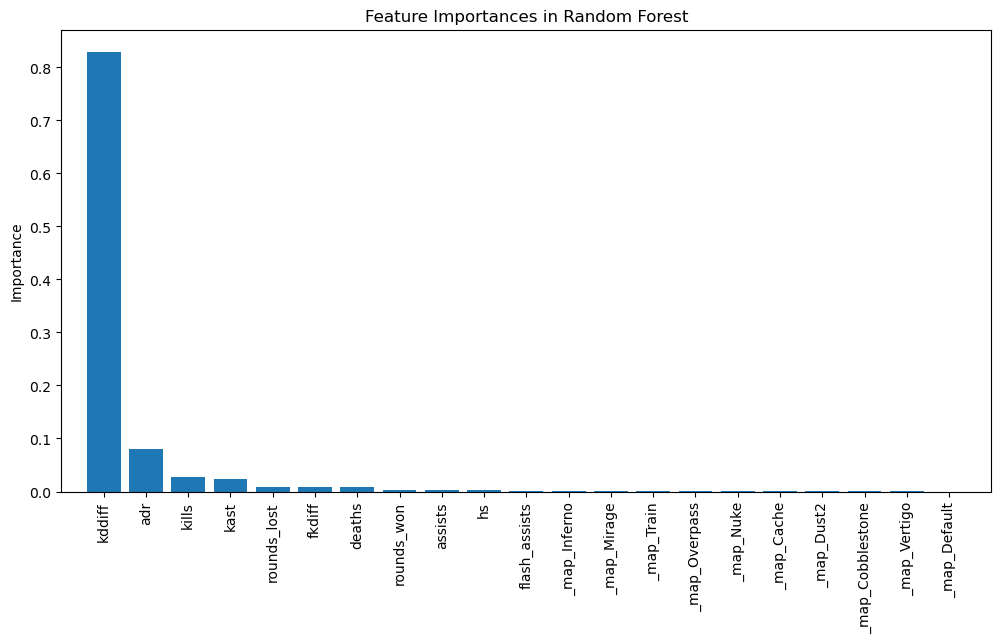

In [11]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)  # Training the model

# Getting feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.show()


/var/folders/_t/pqhgzhkx0s3dlljndz6jmysh0000gn/T/ipykernel_37086/3381991631.py:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y_test, y_test, alpha=0.5, color='red', label='Actual', edgecolors='k', marker='x')


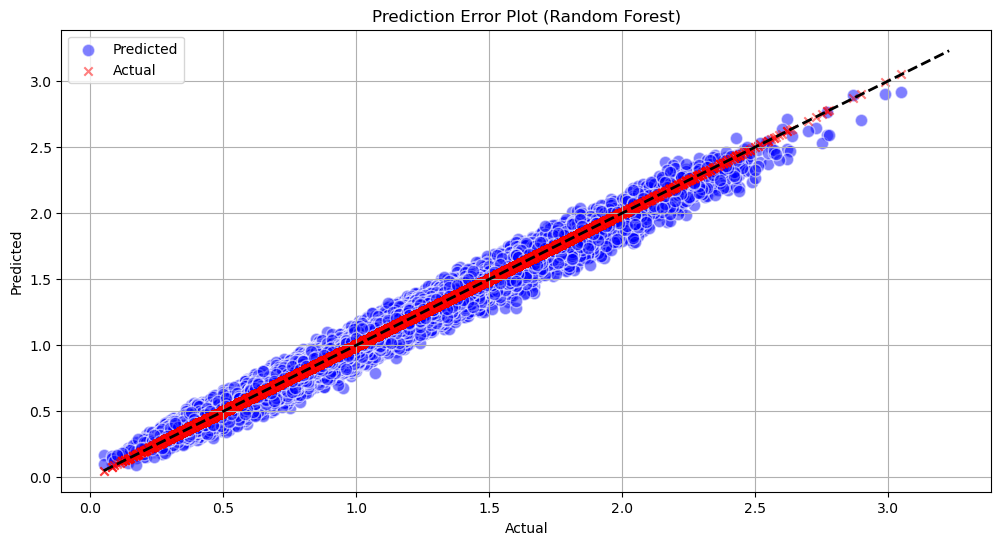

In [17]:
# Prediction Error Plot
# Predictions
y_pred = rf_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted', edgecolors='w', s=80)
plt.scatter(y_test, y_test, alpha=0.5, color='red', label='Actual', edgecolors='k', marker='x')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error Plot (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


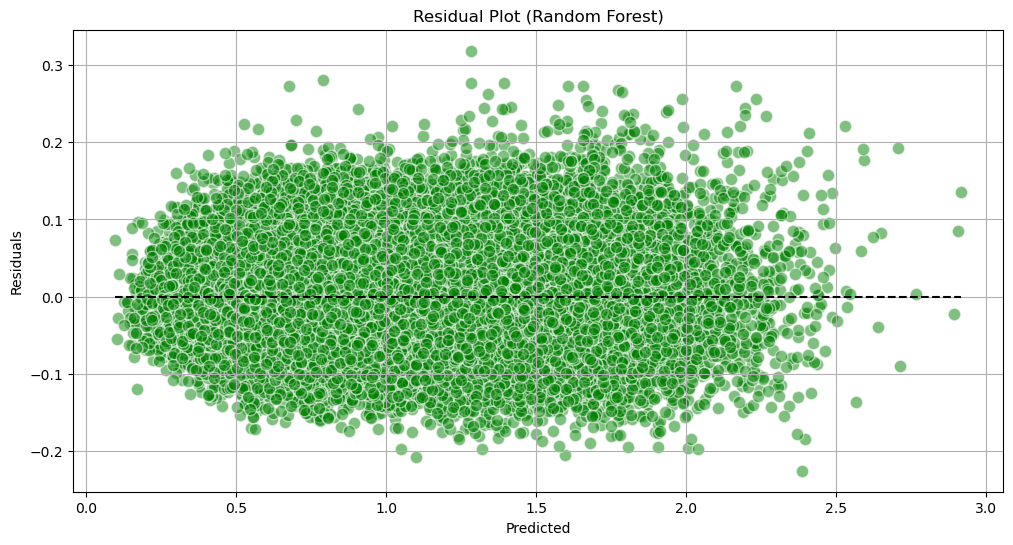

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='green', edgecolors='w', s=80)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.grid(True)
plt.show()


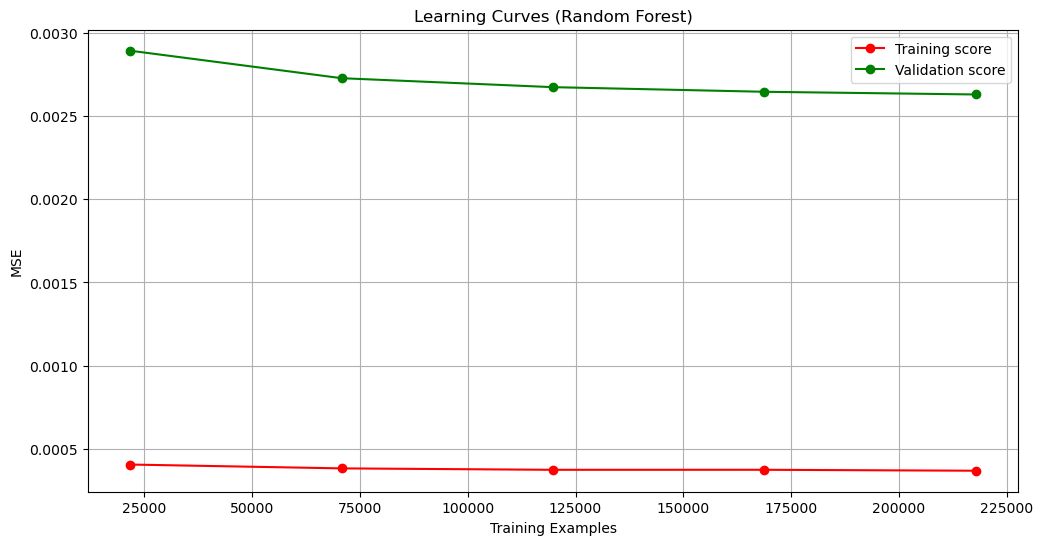

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    rf_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation score")
plt.title('Learning Curves (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.grid()
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326676 entries, 0 to 326675
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       326676 non-null  int64  
 1   player_id      326676 non-null  int64  
 2   team           326676 non-null  object 
 3   _map           326676 non-null  object 
 4   kills          326676 non-null  float64
 5   assists        326676 non-null  float64
 6   deaths         326676 non-null  float64
 7   hs             326676 non-null  float64
 8   flash_assists  326676 non-null  float64
 9   kast           326676 non-null  float64
 10  kddiff         326676 non-null  float64
 11  adr            326676 non-null  float64
 12  fkdiff         326676 non-null  float64
 13  rating         326676 non-null  float64
 14  rounds_won     326676 non-null  int64  
 15  rounds_lost    326676 non-null  int64  
dtypes: float64(10), int64(4), object(2)
memory usage: 42.4+ MB


In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

knn_regressor = KNeighborsRegressor()
# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_regressor.predict(X_test)

# Calculate the performance metrics
rmse_knn = sqrt(mean_squared_error(y_test, y_pred_knn))
print(f'RMSE for KNN Regressor: {rmse_knn}')


RMSE for KNN Regressor: 0.056435620632226666


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    rf_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation score")
plt.title('Learning Curves (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.grid()
plt.show()


In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(12, 6))
    
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring="neg_mean_squared_error")
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, color="r", alpha=0.1)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, color="g", alpha=0.1)
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt


/Users/kirankumarnimmakayala/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


IndexError: index 4 is out of bounds for axis 0 with size 4

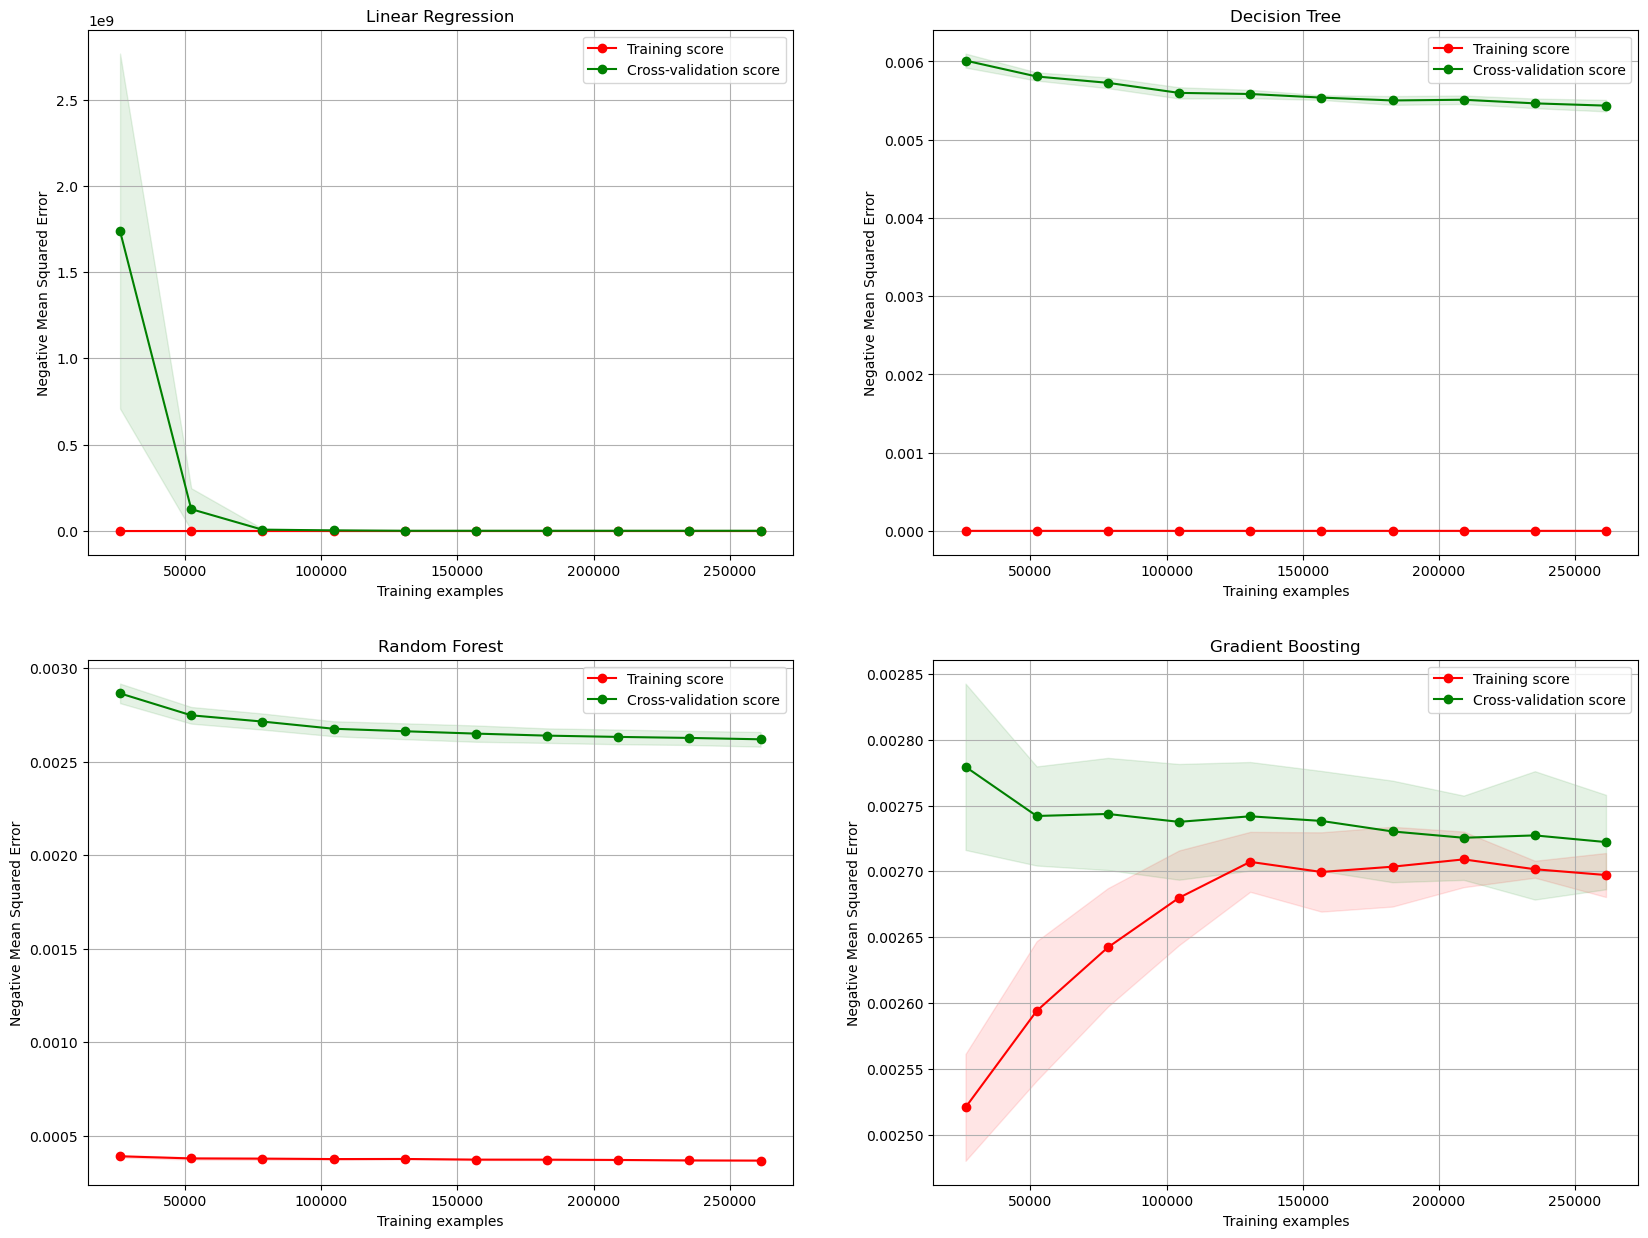

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the models as a list of tuples (name, model)
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=0)),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('KNN', KNeighborsRegressor())
]

# Setup the figure and axes for plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

for i, (name, model) in enumerate(models):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[i].set_title(name)
    axes[i].set_xlabel('Training examples')
    axes[i].set_ylabel('Negative Mean Squared Error')
    axes[i].legend(loc="best")
    axes[i].grid()

# Display the plot
plt.tight_layout()
plt.show()
